# MT2507 Mathematical Modelling: Computing Project

## Instructions

There is one helper worksheet associated with this project. You should work through this sheet before attempting the project.

The project itself is worth 15% of your final grade in the module.  There are 30 marks available.

#### Submitting your project
You should upload your work as a single *.ipynb* file to the relevant *MySaint* area as a single file by **2pm on Friday 25 March 2022** (end of Week 9).  

If you have been working on the server you will need to download the file from this server using `Download as>Notebook` in the `File` menu. The file **must** be downloaded as a Notebook. Your project must be self-contained such that it works when run in sequence (from top to bottom) by the marker.

#### Getting help
Help is available from staff in your computing lab session for each of Weeks 5-9 of the semester, excluding the February vacation.  Make sure to use these well and do not leave all your questions to Week 9 (there are only so many things we can answer in the hour!).

#### Other comments
For each question three empty cells have been added below. This is an arbitrary number and you can add or delete cells as you wish. 

Some questions have been broken down into lettered parts for clarity, but you can answer each question in the cells below the question statement (you don't need to say which corresponds to which part(s)).

## Part 1: A Single Species Population Model

In a simple model for a *biochemical switch* (needed, for example, to explain pattern formation in animal coat markings with stripes or spots) a gene $x$ is activated by an amount of a chemical substance $s$, decays at a linear rate $-rx$, and is self-stimulating by a nonlinear auto-catalytic feedback reaction, leading to an ODE
\begin{equation}
\frac{dx}{dt} = F(x) = s - r x + \frac{x^2}{1+x^2} \; ,
\label{1dode}
\end{equation}
where $s$ and $r$ are positive parameters.


### Question 1.

For this question take the parameters $s=0.01$ and $r=0.4$. The aim of this question is to locate each root of $F(x)=0$ for these parameters, using the Newton-Raphson method.

(a) Make a plot of the function $F(x)$ for suitable $x$ that allows the number of roots of $F(x)=0$ to be found, and initial guesses for each root to be chosen. 

(b) Write a function which implements the Newton-Raphson method.  

The function should have the following arguments: 
- an initial guess
- a function
- the derivative of the function
- suitable stopping condition(s) 

The function should output the following for each iteration:
- the iterate number $n$, 
- the value of $x_n$ and 
- the difference $x_n-x_{n-1}$.  

(c) Use your function of part (b) to find all positive steady states of the ODE to an accuracy of four decimal places. 
 

<div style="text-align: right"> <b> [4 Marks]</b> </div>



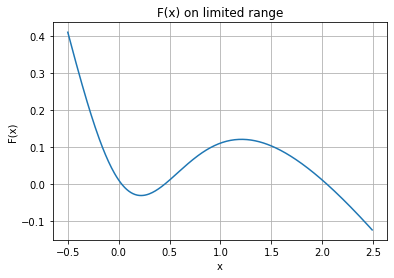

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

def F(x):
    return 0.01 - 0.4*x + x**2/(1+x**2)

def dFdx(x):
    return -0.4+2*x/((1+x**2)**2)

x = np.arange(-0.50,2.50,0.01)

plt.plot(x, F(x))
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('F(x) on limited range')
plt.grid(True)
#appears to have a root near 0, near 0.5 and near 2.0 so 3 roots

In [2]:
def newton_raphson(x0,f,dfdx,error):
    n = 0
    print("\nOur 0th iterate is x_0 = {}".format(x0))
    
    #Ensures stopping condition works properly if initial value is very small
    if x0 < error:
        difference = 10000
    else:
        difference = x0
    
    current_x = x0
    
    #runs the method while the difference between the previous and current value is more than the error
    #includes stopping conditions if scheme diverges or runs into a stationary point
    while difference > error:
        try:
            next_x = current_x - f(current_x)/dfdx(current_x)
        except dfdx(current_x) == 0:
            raise ValueError("Scheme led to an iterate at a stationary point. This resulted in a division by 0.")
        n += 1
        difference = abs(next_x-current_x)
        print("\nOur {}th iterate is x_{} = {} and the absolute difference with the previous iterate is {}.".format(n,n,next_x,difference))
        current_x = next_x
        
        if n > 10000:
            raise ValueError("Iterates have diverged and therefore initial guess is not valid. Try another.")       
    
    print("\nThe root is x = {} with an error less than {}".format(current_x, error))
     
newton_raphson(0.5,F,dFdx,0.00005)
newton_raphson(0,F,dFdx,0.00005)
newton_raphson(2,F,dFdx,0.00005)   


Our 0th iterate is x_0 = 0.5

Our 1th iterate is x_1 = 0.4583333333333333 and the absolute difference with the previous iterate is 0.041666666666666685.

Our 2th iterate is x_2 = 0.4571484384960895 and the absolute difference with the previous iterate is 0.0011848948372438217.

Our 3th iterate is x_3 = 0.4571471342734554 and the absolute difference with the previous iterate is 1.304222634113117e-06.

The root is x = 0.4571471342734554 with an error less than 5e-05

Our 0th iterate is x_0 = 0

Our 1th iterate is x_1 = 0.024999999999999998 and the absolute difference with the previous iterate is 0.024999999999999998.

Our 2th iterate is x_2 = 0.02678428058831999 and the absolute difference with the previous iterate is 0.0017842805883199926.

Our 3th iterate is x_3 = 0.0267934323505824 and the absolute difference with the previous iterate is 9.151762262408353e-06.

The root is x = 0.0267934323505824 with an error less than 5e-05

Our 0th iterate is x_0 = 2

Our 1th iterate is x_1 = 2.041

### Question 2

Solve the ODE of Question 1 numerically using the fourth order Runge-Kutta method for the two initial conditions 

- $x(0) = 0.45$, and 

- $x(0) = 0.5$.

In each case you should choose an appropriate time step $h$ and a suitable total number of steps so that the solution obtained allows the long time behaviour of the solution to be known.

Use the numerical solutions found to produce a plot of both solutions, with $x$ against $t$.

The result, and any subsequent explorations you choose to make, should allow you to characterise the nature of one of the steady states found in Part 1 Question 1.  Explain your finding mathematically (you are not required to provide a biological explanation).

  <div style="text-align: right"> <b> [8 Marks]</b> </div>


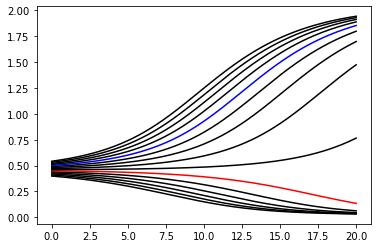

In [3]:
#runge kutta step method
def runge_kutta_step(f,x,t,h):
    k1 = h * f(x)
    k2 = h * f(x + 0.5*k1)
    k3 = h * f(x + 0.5*k2)
    k4 = h * f(x + k3)
    
    return (x + 1/6 * (k1 + 2*k2 + 2*k3 + k4))

#takes in all the information and runs the method
def runge_kutta(f,x,t,tn,n):
    h = (tn-t)/n
    x_values = []
    t_values = []
    
    for i in range(n+1):
        t_values.append(t)
        x = runge_kutta_step(f,x,t,h)
        x_values.append(x)
        t += h

    return x_values, t_values

#Plots the solutions
#Embedded in this loop and the graph below are the solutions for x(0) = 0.45 in red and x(0) = 0.5 in blue
for i in range(15):
    values = runge_kutta(F, 0.40 + i*0.01, 0, 20, 200)
    if 0.40 + i*0.01 == 0.45:
        plt.plot(values[1], values[0], color='red')
    elif 0.40 + i*0.01 == 0.5:
        plt.plot(values[1], values[0], color='blue') 
    else:
        plt.plot(values[1], values[0], 'k-')

By testing many values around the steady state at x=0.457..., including x=0.45,0.5, and plotting them we can see that when starting a small pertubation from the steady state in question, the solutions diverge to other values rather than returning to x=0.457... (steady state). This means it is an unstable steady state.

## Part 2: A  Modified Two-Species Population Model

Consider the system of first-order ODEs modelling two competing species $x(t)$ and $y(t)$ given by

\begin{eqnarray}
\frac{dx}{dt} & = & x( a_1 -b_1 x -c_1 \mathrm{e}^{d_1 y}),  \\
\frac{dy}{dt} & = & y( a_2 -b_2 y -c_2 \mathrm{e}^{d_2 x}) .
\end{eqnarray}

Here all coefficients are assumed to be real and positive. We also assume that $x \ge 0 $ and $y\ge 0$. 

Three of the steady states of this system of equations can be determined analytically as:

* $(x_0,y_0) =(0,0)$,


* $\displaystyle (x_0,y_0) =\left(0, 
\frac{a_2-c_2}{b_2}\right)$, assuming that $a_2 > c_2$,


* $\displaystyle (x_0,y_0) =\left( \frac{a_1-c_1}{b_1},0\right)$, 
assuming that $a_1 > c_1$.


The fourth steady state satisfies the set of equations
\begin{eqnarray}
 a_1 -b_1 x -c_1 \mathrm{e}^{d_1 y}=0, \\
a_2 -b_2 y -c_2 \mathrm{e}^{d_2 x}=0 ,
\end{eqnarray}
which can only be solved numerically.

### Question 1

Using the Newton-Raphson method for functions of two variables, write a Python code to solve for the fourth steady state numerically, using the parameter values  $a_1=b_1=a_2=b_2=1.0$, $c_1=d_1=0.1$, $c_2=0.2$ and $d_2=0.3$.  

Use your code to find the fourth steady state, to four decimal places in both $x$ and $y$.
<div style="text-align: right"> <b> [6 Marks]</b> </div>


In [4]:
#Define our functions of interest in form f(x,y) = 0
X, Y = sym.symbols('X Y', real = True)
F = 1 - X - 0.1*sym.exp(0.1*Y)
G = 1 - Y - 0.2*sym.exp(0.3*X)

#takes initial values, number of iterates, and functions of interest
def newton_raphson(x0,y0,f,g,error):
    #forms jacobian using partial differentiation
    jacobian = sym.Matrix([[sym.diff(f,X), sym.diff(f,Y)],[sym.diff(g,X), sym.diff(g,Y)]])
    try:
        inverse_jacobian = jacobian ** -1
    except sym.det(jacobian) == 0:
        raise TypeError('The matrix doesn\'t have an inverse')
    
    #forms the matrices for the initial solution and functions
    function_and_inv_jacobian = inverse_jacobian * sym.Matrix([[f],[g]])
    lambdify_function_and_inv_jacobian = sym.lambdify([X,Y], function_and_inv_jacobian, modules = 'sympy')
    previous_solution = sym.Matrix([[x0],[y0]])
    print('Our 0th iterates are x = {} and y = {}.'.format(previous_solution[0], previous_solution[1]))
    
    #Ensures stopping condition works properly if initial value(s) is less than error
    if previous_solution[0] < error and previous_solution[1] < error:
        difference = sym.Matrix([[1000],[1000]])
    else:
        difference = previous_solution
    
    #the actual method with a stopping condition for 4dp and divergent solutions
    count = 0
    while difference[0] > error or difference[1] > error:
        #To ensure the loop doesn't continue forever if solution diverges
        if count > 100000:
            raise ValueError('Solution has most likely diverged, try different initial conditions!')
            
        count += 1
        next_solution = previous_solution - lambdify_function_and_inv_jacobian(previous_solution[0],previous_solution[1])
        difference = abs(previous_solution - next_solution)
        previous_solution = next_solution
        print('\nOur {}th iterates are x = {} and y = {}. \nThe absolute difference with the previous x iterate is {} and with the y iterate is {}.'.format(count, previous_solution[0], previous_solution[1], difference[0], difference[1]))

    return sym.Matrix([[round(previous_solution[0],4)],[round(previous_solution[1],4)]])

coexistence = newton_raphson(1,1,F,G,0.00005)
print('\nSo the steady state is at x = {} and y = {} to 4dp.'.format(coexistence[0],coexistence[1]))

Our 0th iterates are x = 1 and y = 1.

Our 1th iterates are x = 0.892370218728176 and y = 0.738745338977234. 
The absolute difference with the previous x iterate is 0.107629781271824 and with the y iterate is 0.261254661022766.

Our 2th iterates are x = 0.892334297603901 and y = 0.738608925460139. 
The absolute difference with the previous x iterate is 0.0000359211242753066 and with the y iterate is 0.000136413517095813.

Our 3th iterates are x = 0.892334297594038 and y = 0.738608925445734. 
The absolute difference with the previous x iterate is 9.86266623925758E-12 and with the y iterate is 1.44042555660917E-11.

So the steady state is at x = 0.8923 and y = 0.7386 to 4dp.


### Question 2

Write a Python code to solve the system of ODEs numerically using the fourth order Runge-Kutta method, for the parameter values given in Question 1.


Use and extend this code to produce a phase plane plot. The phase plane plot should show

(a) the steady states, and

(b) plots of solutions produced using your ODE solver. 


When producing the plot choose appropriate initial conditions such that each possible type of phase space trajectory is illustrated by at least one example solution.

<div style="text-align: right"> <b> [12 Marks]</b> </div>


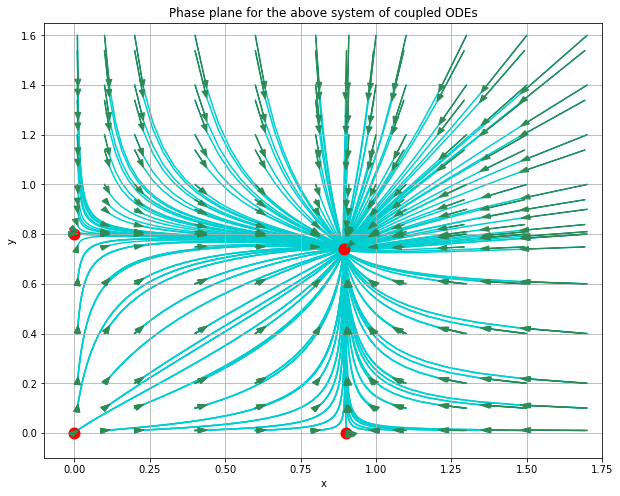

In [5]:
#lists the steady states
steady_states = [[0,0],coexistence,[0.9,0],[0,0.8]]
xsteady_states = [0,coexistence[0],0.9]
ysteady_states = [0,coexistence[1],0.8]

#defines our system of ODEs
def F(x, y, t):
    return np.array([x*(1 - x - 0.1*np.exp(0.1*y)),y*(1 - y - 0.2*np.exp(0.3*x))])

#the runge kutta step
def RK4step(x,y,t,h,f):
    k1 = h*f(x,y,t)
    k2 = h*f(x+k1[0]/2.0,y+k1[1]/2.0,t+h/2.0)
    k3 = h*f(x+k2[0]/2.0,y+k2[1]/2.0,t+h/2.0)
    k4 = h*f(x+k3[0],y+k3[1],t+h)
    return [x+1/6*(k1[0]+2*k2[0]+2*k3[0]+k4[0]),y+1/6*(k1[1]+2*k2[1]+2*k3[1]+k4[1])]

#function which plots each solution curve and adds arrows to indicate direction
def ode_plotter(x,y):
    plt.plot(x,y,'darkturquoise', zorder = 1)
    plt.arrow(x[0], y[0], x[1]-x[0], y[1]-y[0], color = 'seagreen', head_width = 0.02, length_includes_head = True, zorder = 2)

#function which takes in all the information required, runs the method and then runs the plotting function
def runge_kutta_2d(x,y,t,tn,n,f):
    h = (tn-t)/n
    xstore = [x]
    ystore = [y]
    
    for i in range(n + 1):
        [x,y] = RK4step(x,y,t,h,f)
        t += h
        xstore.append(x)
        ystore.append(y)
        
    ode_plotter(xstore,ystore)


#Aesthetics for the plot    
plt.figure(figsize = (10,8))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase plane for the above system of coupled ODEs')
plt.xlim(-0.1,1.75)
plt.ylim(-0.1,1.65)
plt.grid(True)

#plots the steady states on the graph as red dots
for point in steady_states:
    plt.scatter(point[0], point[1], linewidth = 6, zorder = 2, color = 'red')

delta = [0.01,0.1,0.2,0.4,0.6,0.8]

#iterates through all the values above in order to create all the different solution curves we need to plot
for i in delta:
    for j in delta:
        for k in range(len(xsteady_states)):
            runge_kutta_2d(i+float(xsteady_states[k]),j+float(ysteady_states[k]),0,10,50,F)
            runge_kutta_2d(i,j+float(ysteady_states[k]),0,10,50,F)
            runge_kutta_2d(i+float(xsteady_states[k]),j,0,10,50,F)
            
            
plt.show()   